# 05 - Unsupervised Learning (KMeans & Hierarchical)

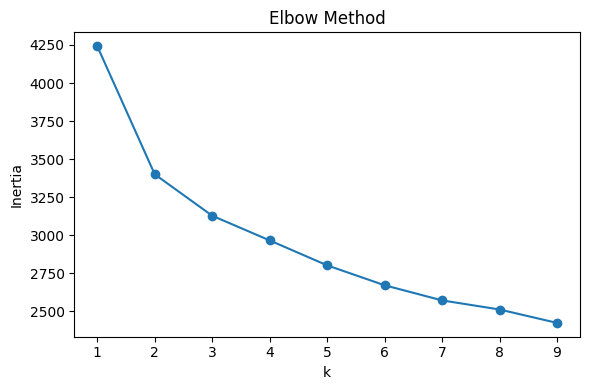

KMeans Cluster    0    1
True                    
0                 6  158
1               101   38


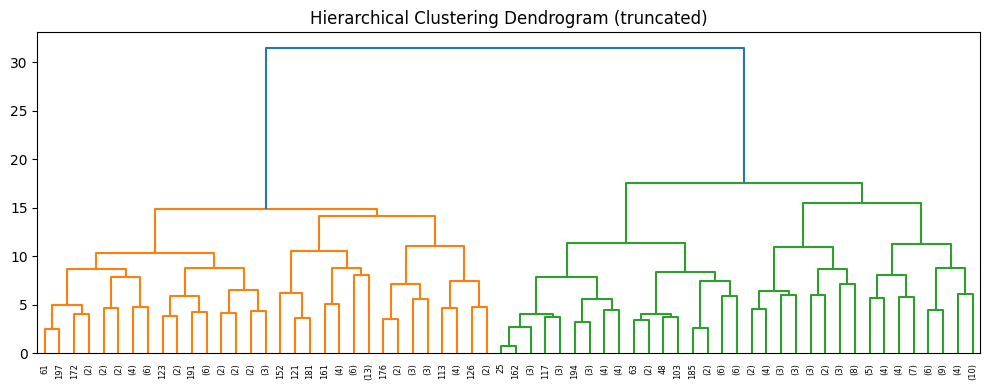

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

CLEAN_PATH = Path.cwd().parents[0] / 'data' / 'heart_disease_clean.csv'
df = pd.read_csv(CLEAN_PATH)

X = df.drop(columns=['target'])
y = df['target']

X_num = X.select_dtypes(include=[np.number])
X_scaled = StandardScaler().fit_transform(X_num)

# Elbow method for K
inertias = []
Ks = range(1, 10)
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(Ks, inertias, marker='o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Method')
plt.tight_layout()
plt.savefig('../results/kmeans_elbow.png', dpi=150)
plt.show()

# Choose k=2 (healthy vs disease-ish) for visualization
km2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_km = km2.fit_predict(X_scaled)

# Compare with true labels
ct = pd.crosstab(y, labels_km, rownames=['True'], colnames=['KMeans Cluster'])
print(ct)

# Hierarchical clustering
Z = linkage(X_scaled[:200], method='ward')  # subset for readability
plt.figure(figsize=(10,4))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.tight_layout()
plt.savefig('../results/hierarchical_dendrogram.png', dpi=150)
plt.show()
